# Regression Testing

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Review of sf DataFrame

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

In [3]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   hood_district  989 non-null    float64
 2   sqft           989 non-null    float64
 3   beds           989 non-null    float64
 4   bath           989 non-null    float64
 5   laundry        989 non-null    int64  
 6   pets           989 non-null    int64  
 7   housing_type   989 non-null    int64  
 8   parking        989 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 69.7 KB


In [4]:
sf.head()

,price,hood_district,sqft,beds,bath,laundry,pets,housing_type,parking
0,6800,7.0,1600.0,2.0,2.0,2,0,0,3
1,3500,7.0,550.0,1.0,1.0,2,3,0,3
2,5100,7.0,1300.0,2.0,1.0,2,3,0,0
3,9000,7.0,3500.0,3.0,2.5,2,0,0,3
4,3100,7.0,561.0,1.0,1.0,0,3,0,0


In [5]:
sf.describe()

,price,hood_district,sqft,beds,bath,laundry,pets,housing_type,parking
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,7.052578,976.765420,1.679474,1.390293,1.360971,1.247725,0.125379,1.486350
std,1546.222670,2.404716,474.629798,1.076710,0.562714,0.704334,1.400660,0.567733,1.506755
min,750.000000,1.000000,150.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2650.000000,6.000000,650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3300.000000,8.000000,900.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,4242.000000,9.000000,1200.000000,2.000000,2.000000,2.000000,3.000000,0.000000,3.000000
max,19000.000000,10.000000,3500.000000,6.000000,4.000000,2.000000,3.000000,3.000000,4.000000


In [6]:
sf.corr()

,price,hood_district,sqft,beds,bath,laundry,pets,housing_type,parking
price,1.000000,0.013010,0.835834,0.673328,0.691190,0.332432,0.075987,0.153169,0.247466
hood_district,0.013010,1.000000,-0.038425,-0.109195,0.022967,0.276222,0.103408,-0.182762,0.142384
sqft,0.835834,-0.038425,1.000000,0.765070,0.720929,0.270940,0.049952,0.244909,0.189424
beds,0.673328,-0.109195,0.765070,1.000000,0.629331,0.175409,0.035925,0.209861,0.010090
bath,0.691190,0.022967,0.720929,0.629331,1.000000,0.303041,0.096156,0.114383,0.220568
laundry,0.332432,0.276222,0.270940,0.175409,0.303041,1.000000,0.237574,0.015794,0.343696
pets,0.075987,0.103408,0.049952,0.035925,0.096156,0.237574,1.000000,-0.087465,0.086251
housing_type,0.153169,-0.182762,0.244909,0.209861,0.114383,0.015794,-0.087465,1.000000,0.017384
parking,0.247466,0.142384,0.189424,0.010090,0.220568,0.343696,0.086251,0.017384,1.000000


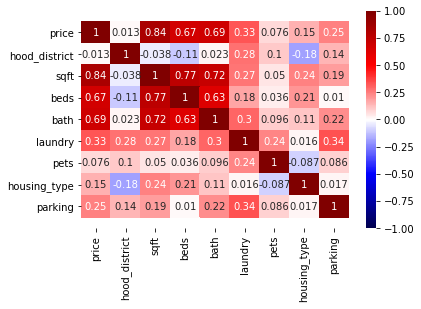

In [7]:
# example of a better corr matrix
sns.heatmap(sf.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(sf.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


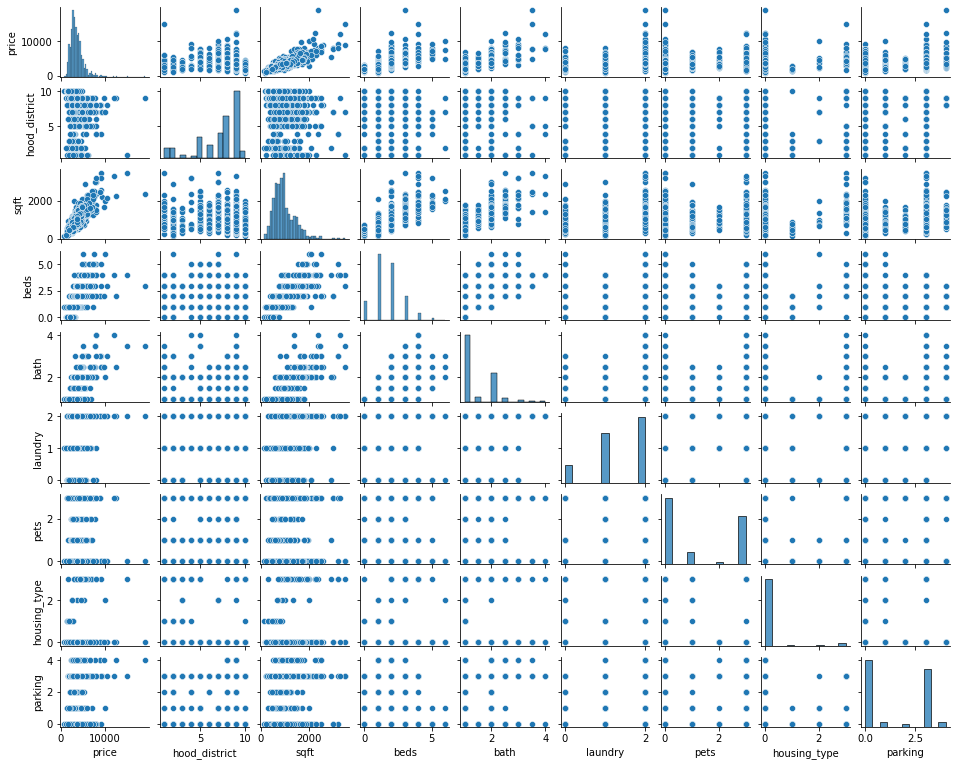

In [8]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(sf, height=1.2, aspect=1.25);

## Reduced_sf DataFrame 

Still unsure of how to deal with hoods and amenities -- so let's take a look without those cols in a reduced version 
of the dataframe.

In [9]:
reduced_sf = sf[['price', 'sqft', 'beds', 'bath']]

In [10]:
reduced_sf.head()

,price,sqft,beds,bath
0,6800,1600.0,2.0,2.0
1,3500,550.0,1.0,1.0
2,5100,1300.0,2.0,1.0
3,9000,3500.0,3.0,2.5
4,3100,561.0,1.0,1.0


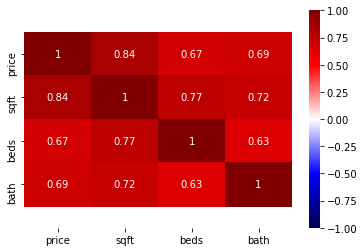

In [11]:
# example of a better corr matrix
sns.heatmap(reduced_sf.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(reduced_sf.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off

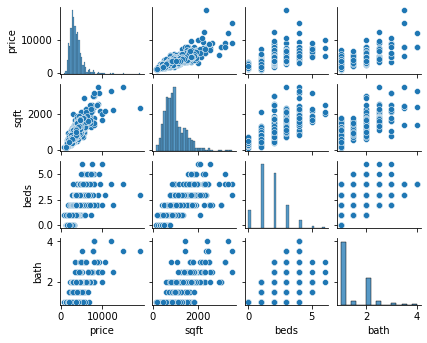

In [12]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(reduced_sf, height=1.2, aspect=1.25);

### Regression with sklearn

In [13]:
reduced_sf.head(3)

,price,sqft,beds,bath
0,6800,1600.0,2.0,2.0
1,3500,550.0,1.0,1.0
2,5100,1300.0,2.0,1.0


#### Single independent variable

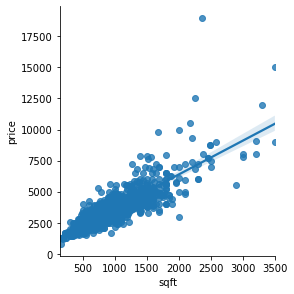

In [14]:
sns.lmplot(x='sqft', y='price', data=reduced_sf, height=4);

In [15]:
#Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
# If using just ONE feature, we should apply `.values.reshape(-1, 1)`
X = reduced_sf['sqft'].values.reshape(-1, 1)

# Choose the response variable
y = reduced_sf['price']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [16]:
lr.score(X,y)

0.6986176510656257

#### Multiple independent variables

In [17]:
reduced_sf.head(3)

,price,sqft,beds,bath
0,6800,1600.0,2.0,2.0
1,3500,550.0,1.0,1.0
2,5100,1300.0,2.0,1.0


In [18]:
model = LinearRegression()

# Construct the data matrix, X, using X1 and X3 as features
# Hint: now that you have more than one feature, you can work with dataframes 
X = reduced_sf[['sqft', 'beds', 'bath']]

# Choose the response variable
y = reduced_sf['price']

# Fit the model 
model.fit(X, y)

# Score the model (with R^2)
model.score(X, y)

0.7159141709042369

In [19]:
# print out intercept
print("Intercept: ", model.intercept_)

# print out other coefficients
print("Coefficients: ", model.coef_)

Intercept:  666.8587955481671
Coefficients:  [  2.18711602  69.67558797 485.40763346]


#### Model

In [21]:
features = ['sqft', 'beds', 'bath']

model = LinearRegression()

# Construct the data matrix, X, using X1 and X3 as features
# Hint: now that you have more than one feature, you can work with dataframes 
X = reduced_sf[features]
X = sm.add_constant(X)

# Choose the response variable
y = reduced_sf['price']

# Fit the model 
lm = sm.OLS(y, X)
lm = lm.fit()

# Score the model (with R^2)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     827.4
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.41e-268
Time:                        10:49:15   Log-Likelihood:                -8043.3
No. Observations:                 989   AIC:                         1.609e+04
Df Residuals:                     985   BIC:                         1.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        666.8588     71.135      9.375      0.000     527.265     806.452
sqft           2.1871      0.098     22.353      0.000       1.995       2.379
beds          69.6756     38.462      1.812      0.070      -5.800     145.152
bath         485.4076     68.383      7.098      0.000     351.214     619.601
==============================================================================
Omnibus:                      836.353   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64804.091
Skew:                           3.360   Prob(JB):                         0.00
Kurtosis:                      42.082   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using Dummy Variables

In [22]:
sf.head(3)

,price,hood_district,sqft,beds,bath,laundry,pets,housing_type,parking
0,6800,7.0,1600.0,2.0,2.0,2,0,0,3
1,3500,7.0,550.0,1.0,1.0,2,3,0,3
2,5100,7.0,1300.0,2.0,1.0,2,3,0,0


In [23]:
sf['hood_district'].nunique()

10

In [24]:
pd.get_dummies(sf['hood_district']).head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [25]:
sf2 = sf[['price', 'sqft', 'beds', 'bath']]

In [26]:
sf2['hood'] = sf['hood_district'].astype(str)
sf2['laundry'] = sf['laundry'].astype(str)
sf2['pets'] = sf['pets'].astype(str)
sf2['housing_type'] = sf['housing_type'].astype(str)
sf2['parking'] = sf['parking'].astype(str)

<ipython-input-26-91f6f8ac6836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf2['hood'] = sf['hood_district'].astype(str)
<ipython-input-26-91f6f8ac6836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf2['laundry'] = sf['laundry'].astype(str)
<ipython-input-26-91f6f8ac6836>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [27]:
sf2.head()

,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking
0,6800,1600.0,2.0,2.0,7.0,2,0,0,3
1,3500,550.0,1.0,1.0,7.0,2,3,0,3
2,5100,1300.0,2.0,1.0,7.0,2,3,0,0
3,9000,3500.0,3.0,2.5,7.0,2,0,0,3
4,3100,561.0,1.0,1.0,7.0,0,3,0,0


In [28]:
sf2.dtypes

price             int64
sqft            float64
beds            float64
bath            float64
hood             object
laundry          object
pets             object
housing_type     object
parking          object
dtype: object

In [29]:
sf2 = pd.get_dummies(sf2)

In [30]:
sf2

,price,sqft,beds,bath,hood_1.0,hood_10.0,hood_2.0,hood_3.0,hood_4.0,hood_5.0,...,pets_3,housing_type_0,housing_type_1,housing_type_2,housing_type_3,parking_0,parking_1,parking_2,parking_3,parking_4
0,6800,1600.0,2.0,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,3500,550.0,1.0,1.0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,5100,1300.0,2.0,1.0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,9000,3500.0,3.0,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3100,561.0,1.0,1.0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,3595,1200.0,2.0,1.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
985,4695,1700.0,3.0,2.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
986,1950,450.0,1.0,1.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
987,3600,1100.0,3.0,1.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = sf2.drop('price',axis=1), sf2['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=37)

In [41]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [42]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.807
Ridge Regression val R^2: 0.808
Degree 2 polynomial regression val R^2: -5238290961.955
